# **Deep Learning with Keras and TensorFlow – Advanced Keras**

This module introduces **Advanced Keras** and its use in **Deep Learning**, highlighting the role of the **Keras Functional API** in building complex models.

#### **Key Points of the Module**
1. **Introduction to Advanced Keras**
   - Keras is widely used in **industry and academia** for applications like **image recognition, natural language processing, and recommendation systems**.
   - Companies like **Google, Netflix, and Uber** leverage Keras for developing **advanced AI solutions**.

2. **Differences Between Sequential API and Functional API**
   - **Sequential API**: Suitable for **linear models** (stacked structure).
   - **Functional API**: Allows the creation of more **flexible and complex** models with:
     - **Multiple inputs and outputs**
     - **Shared layers**
     - **Non-linear architectures** (multi-branch models, residual connections, etc.)

3. **Advantages of the Keras Functional API**
   - **Greater clarity** in model structure.
   - **Easier debugging** due to an explicit representation of the data flow.
   - **Reusability** of layers and models across different parts of the architecture.

4. **Practical Applications**
   - **Multi-input model example**: Two inputs (A and B) processed separately and then combined into a single output.
   - **Real-world use cases**:
     - **Healthcare**: Diagnosing diseases through **medical image analysis**.
     - **Finance**: Predicting **market trends**.
     - **Autonomous driving**: **Object detection and lane detection** for self-driving vehicles.

5. **Conclusion**
   - The **Keras Functional API** is a powerful tool for building advanced models.
   - It overcomes the limitations of the Sequential API by enabling the construction of sophisticated neural networks.
   - Understanding and using this API enhances model capabilities and helps tackle complex problems across multiple domains.

In [3]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input

In [4]:
# Create a Sequential model API
model = Sequential(
    [
        Dense(64, activation="relu", input_shape=(784,)),
        Dense(10, activation="softmax")
    ]
)

# Compile the model
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

c:\Users\DELL\anaconda3\envs\my_env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
# Create a Functional API
# Define the input tensor
# The shape (784,) indicates that each input sample is a vector of 784 elements.
# This is typical for flattened image data, such as 28x28 pixel images from the MNIST dataset.
inputs = Input(shape=(784, ))

# Define the layers
x = Dense(64, activation="relu")(inputs)
outputs = Dense(10, activation="softmax")(x)

# Create the Model
model = Model(inputs=inputs, outputs=outputs)

# Compile the model
# The compile step configures the model for training by specifying the optimizer, loss function, and metrics.
# optimizer="adam": Uses the Adam optimizer, which is an adaptive learning rate optimization algorithm.
# loss="sparse_categorical_crossentropy": Uses sparse categorical crossentropy loss, suitable for multi-class classification with integer labels.
# metrics=["accuracy"]: Monitors the accuracy metric during training and evaluation.
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

**Differences between Sequential API and Functional API**

- **Sequential API**:  
  Allows you to build models with a linear structure (one layer after the other).

- **Functional API**:  
  Offers more flexibility by enabling the creation of models with multiple inputs and outputs, shared layers, and non-linear architectures.

## Keras Functional API and Subclassing API

How to **build complex models** and **comparing the different APIs** available in Keras.

### **Keras Functional API and Subclassing API**  

The video introduces **Keras Functional API** and **Subclassing API**, explaining how to build complex models and comparing the different APIs available in Keras.  

#### **1. Keras Functional API**  
- Enables creating **more complex and flexible models** compared to the Sequential API.  
- Supports **multiple inputs and outputs**, shared layers, and **nonlinear data flows**.  
- Instead of stacking layers sequentially, layers are connected in a **graph**.  
- A multi-input model is built by defining separate inputs, processing them through different paths, and merging them before the final output.  
- **Shared layers**: A single layer can be applied to multiple inputs (useful for **Siamese networks**, where two inputs are processed by the same network).  
- **Practical example**: A model with two inputs, each processed separately, merged, and passed through additional layers to produce a single output.  

In [6]:
from tensorflow.keras.layers import concatenate

In [7]:
# Define two set of Inputs
inputA = Input(shape=(64, ))
inputB = Input(shape=(128, ))

# The first branch operates on the first input
x = Dense(8, activation="relu")(inputA)
x = Dense(4, activation="relu")(x)
x = Model(inputs=inputA, outputs=x)

# The second branch operates on the second input
y = Dense(16, activation="relu")(inputB)
y = Dense(4, activation="relu")(y)
y = Model(inputs=inputB, outputs=y)

# Combine the output of the two branches
combined = concatenate([x.output, y.output])

# Apply a FC layer and then a regression prediction on the combined outputs
z = Dense(2, activation="relu")(combined)
z = Dense(1, activation="linear")(z)

# The model will accept the inputs of the two branches and then output a single value
model = Model(inputs=[x.input, y.input], outputs=z)

# Compile the module
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# Print the summary of the model
model.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 64)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_3       │ (None, 128)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_4 (Dense)     │ (None, 8)         │        520 │ input_layer_2[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_6 (Dense)     │ (None, 16)        │      2,064 │ input_layer_3[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_5 (Dense)     │ (None, 4)         │         36 │ dense_4[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_7 (Dense)     │ (None, 4)         │         68 │ dense_6[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 8)         │          0 │ dense_5[0][0],    │
│ (Concatenate)       │                   │            │ dense_7[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_8 (Dense)     │ (None, 2)         │         18 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_9 (Dense)     │ (None, 1)         │          3 │ dense_8[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 2,709 (10.58 KB)

 Trainable params: 2,709 (10.58 KB)

 Non-trainable params: 0 (0.00 B)

### Shared Layers and complex architecture



In [8]:
from tensorflow.keras.layers import Lambda

In [9]:
# Define the input layer
input = Input(shape=(28, 28, 1))

# Define a shared convolutional base
conv_base = Dense(64, activation="relu")

# Process the input through the shared layer
processed_1 = conv_base(input)
processed_2 = conv_base(input)

# Create a model using the shared layer
model = Model(inputs=input, outputs=[processed_1, processed_2])

# Compile the model
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

model.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4       │ (None, 28, 28, 1) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_10 (Dense)    │ (None, 28, 28,    │        128 │ input_layer_4[0]… │
│                     │ 64)               │            │ input_layer_4[0]… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 128 (512.00 B)

 Trainable params: 128 (512.00 B)

 Non-trainable params: 0 (0.00 B)

In [10]:
# Complex model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.activations import relu, linear

In [11]:
# First input model 
inputA = Input(shape=(32, 32, 1))
x = Conv2D(32, (3, 3), activation=relu)(inputA)
x = MaxPooling2D((2, 2))(x)
x = Flatten()(x)
modelA = Model(inputs=inputA, outputs=x)

# Second input model
inputB = Input(shape=(32, 32, 1))
y = Conv2D(32, (3, 3), activation=relu)(inputB)
y = MaxPooling2D((2, 2))(y)
y = Flatten()(y)
modelB = Model(inputs=inputB, outputs=y)

# Combine the output of the two branches
combined = concatenate([modelA.output, modelB.output])

# Apply a FC layer and then a regression prediction on the combined outputs 
z = Dense(64, activation=relu)(combined)
z = Dense(1, activation=linear)(z)

# The model will accept the inputs of the two branches and then output a single value
model = Model(inputs=[modelA.input, modelB.input], outputs=z)

# Compile the model
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

model.summary()


Model: "functional_8"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5       │ (None, 32, 32, 1) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_6       │ (None, 32, 32, 1) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 30, 30,    │        320 │ input_layer_5[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 30, 30,    │        320 │ input_layer_6[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 15, 15,    │          0 │ conv2d[0][0]      │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 15, 15,    │          0 │ conv2d_1[0][0]    │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten (Flatten)   │ (None, 7200)      │          0 │ max_pooling2d[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_1 (Flatten) │ (None, 7200)      │          0 │ max_pooling2d_1[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_1       │ (None, 14400)     │          0 │ flatten[0][0],    │
│ (Concatenate)       │                   │            │ flatten_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_11 (Dense)    │ (None, 64)        │    921,664 │ concatenate_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_12 (Dense)    │ (None, 1)         │         65 │ dense_11[0][0]    │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 922,369 (3.52 MB)

 Trainable params: 922,369 (3.52 MB)

 Non-trainable params: 0 (0.00 B)

#### **Subclassing API**  
- The most flexible Keras API, allowing **custom and dynamic models**.  
- Lets users **redefine model behavior** by subclassing the `Model` class and implementing the `call()` method.  
- Useful when model architecture needs to change dynamically, such as in **Reinforcement Learning**.  
- **Custom training loops**: Provides full control over the training process using `tf.GradientTape`, instead of the standard `keras.fit()` method.  
- **Dynamic graphs**: Model architecture can change based on input data, unlike static graphs in other APIs.  

In [12]:
import tensorflow as tf

In [13]:
# Define your model by subclassing
class MyModel(tf.keras.Model):
    def __init__(self):
        super(MyModel, self).__init__()
        # Define layers
        self.dense1 = Dense(64, activation="relu")
        self.dense2 = Dense(10, activation="softmax")
    
    def call(self, inputs):
        # Forward pass
        x = self.dense1(inputs)
        return self.dense2(x)

# Instantiate the Model 
model = MyModel()

# Define a loss function and optimizer
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam()

# model.compile(optimizer=optimizer, loss=loss_fn, metrics=["accuracy"])

# Print the summary of the model
# model.summary()


#### Use Cases Example

In [14]:
# Define numbers of epochs
epochs = 5

# Create a dummy training dataset
(train_images, train_labels), _ = tf.keras.datasets.mnist.load_data()
train_images = train_images.reshape(-1, 28*28).astype("float32") / 255
# Flatten and normalize
train_labels = train_labels.astype("int32")
# Create a tf.data dataset for batching
train_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels)).batch(32)

# Custom training loop
for epoch in range(epochs):
    print(f"Epoch {epoch+1}/{epochs}")
    for x_batch, y_batch in train_dataset:
        with tf.GradientTape() as tape:
            predictions = model(x_batch, training=True)
            loss = loss_fn(y_batch, predictions)
        gradients = tape.gradient(loss, model.trainable_variables)
        optimizer.apply_gradients(zip(gradients, model.trainable_variables))
        print(f"Epoch {epoch+1}, Loss: {loss.numpy():.4f}")

Epoch 1/5
Epoch 1, Loss: 2.4171
Epoch 1, Loss: 2.2025
Epoch 1, Loss: 2.2028
Epoch 1, Loss: 2.0986
Epoch 1, Loss: 2.1843
Epoch 1, Loss: 2.1197
Epoch 1, Loss: 1.9534
Epoch 1, Loss: 1.9452
Epoch 1, Loss: 1.9814
Epoch 1, Loss: 1.8031
Epoch 1, Loss: 1.8529
Epoch 1, Loss: 1.7868
Epoch 1, Loss: 1.8220
Epoch 1, Loss: 1.6372
Epoch 1, Loss: 1.6007
Epoch 1, Loss: 1.8290
Epoch 1, Loss: 1.7324
Epoch 1, Loss: 1.5918
Epoch 1, Loss: 1.7185
Epoch 1, Loss: 1.7432
Epoch 1, Loss: 1.6840
Epoch 1, Loss: 1.3957
Epoch 1, Loss: 1.3754
Epoch 1, Loss: 1.4357
Epoch 1, Loss: 1.3520
Epoch 1, Loss: 1.1850
Epoch 1, Loss: 1.3811
Epoch 1, Loss: 1.3402
Epoch 1, Loss: 1.3387
Epoch 1, Loss: 1.2911
Epoch 1, Loss: 1.1785
Epoch 1, Loss: 1.2420
Epoch 1, Loss: 1.2552
Epoch 1, Loss: 1.4044
Epoch 1, Loss: 1.1568
Epoch 1, Loss: 1.4162
Epoch 1, Loss: 0.9667
Epoch 1, Loss: 0.7664
Epoch 1, Loss: 1.2535
Epoch 1, Loss: 0.9946
Epoch 1, Loss: 0.9988
Epoch 1, Loss: 0.9403
Epoch 1, Loss: 0.9894
Epoch 1, Loss: 0.9493
Epoch 1, Loss: 0.9325


In [15]:
# Install necessary libraries
%pip install networkx
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


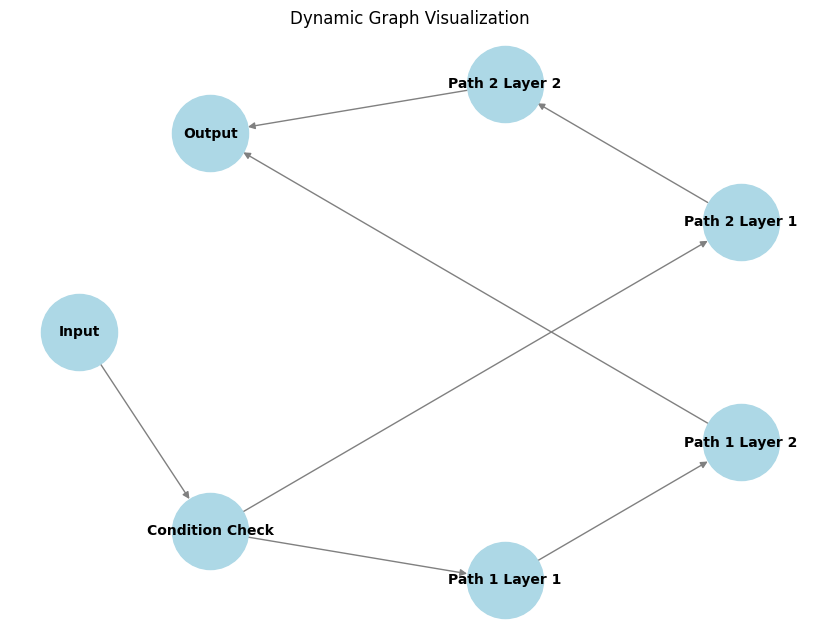

In [16]:
import matplotlib.pyplot as plt
import networkx as nx

# Create a graph
G = nx.DiGraph()

# Adding nodes
G.add_node("Input")
G.add_node("Condition Check")
G.add_node("Path 1 Layer 1")
G.add_node("Path 1 Layer 2")
G.add_node("Path 2 Layer 1")
G.add_node("Path 2 Layer 2")
G.add_node("Output")

# Adding edges for dynamic flow
G.add_edges_from([
    ("Input", "Condition Check"),
    ("Condition Check", "Path 1 Layer 1"),
    ("Path 1 Layer 1", "Path 1 Layer 2"),
    ("Path 1 Layer 2", "Output"),
    ("Condition Check", "Path 2 Layer 1"),
    ("Path 2 Layer 1", "Path 2 Layer 2"),
    ("Path 2 Layer 2", "Output")
])

# Position nodes using a shell layout
pos = nx.shell_layout(G)

# Draw the graph
plt.figure(figsize=(8, 6))
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=3000, 
        font_size=10, font_weight='bold', edge_color='gray')
plt.title("Dynamic Graph Visualization")
plt.show()


# **Explanation of the Code: Dynamic Graph Visualization using NetworkX**

## **Overview**
This Python script creates and visualizes a **directed graph (DiGraph)** using the `networkx` library. The graph represents a **dynamic flow model**, where an input node is processed through a **conditional check** that determines two possible pathways before reaching the final output.

## **Step-by-Step Explanation**
1. **Installing Dependencies**  
   The script ensures that `networkx` and `matplotlib` are installed, as they are required for graph creation and visualization.

2. **Importing Libraries**  
   - `networkx`: Used to create and manipulate graphs.
   - `matplotlib.pyplot`: Used to visualize the graph.

3. **Creating the Graph**  
   - A **directed graph** (`DiGraph()`) is initialized.
   - **Nodes** representing different stages of the model (`Input`, `Condition Check`, `Path 1 Layer 1`, etc.) are added.

4. **Defining Edges for Dynamic Flow**  
   - Directed **edges** are added to represent the **flow of data** through different layers.
   - The `Condition Check` node branches into two paths:
     - **Path 1** (Layer 1 → Layer 2 → Output)
     - **Path 2** (Layer 1 → Layer 2 → Output)
   - Both paths eventually merge into the **Output** node.

5. **Positioning and Drawing the Graph**  
   - The **shell layout** (`nx.shell_layout(G)`) is used to arrange nodes in a circular structure.
   - The graph is plotted with:
     - **Labeled nodes** (`with_labels=True`)
     - **Light blue node color**
     - **Gray edges**
     - **Bold text for readability**
   - The visualization provides a **clear representation** of how input data flows through different layers before reaching the final output.

## **Key Features**
- **Dynamic structure**: The graph dynamically represents a **decision-based model**.
- **Multiple pathways**: Shows how different layers can process input data based on conditions.
- **Useful for AI/ML models**: Can be applied in **neural networks**, **workflow automation**, and **decision trees**.

### **Final Output**
The script **generates a visual graph** that helps understand the dynamic flow between different processing layers.



#### **Conclusion**  
- **Keras Functional API**: Best for building complex models with **multiple inputs/outputs and shared layers**.  
- **Subclassing API**: Ideal for **fully customized models** and advanced training with dynamic data flows.  
- **tf.GradientTape**: Provides greater control over the training process compared to built-in methods.  

This lesson offers a comprehensive overview of Keras APIs and their applications in advanced deep learning models.